###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Vapor-Liquid Equilibrium for Pure Components

This [IPython notebook](http://ipython.org/notebook.html) describes the modeling of vapor-liquid equilibrium with Antoine's equation, including the calculation of saturation pressure, saturation temperature, relative humidity, and normal boiling points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gibb's Phase Rule

The Gibb's phase rule tells us how many independent thermodynamic variables (such as $T$, $P$, $\hat{V}$, or $x_i$) are required to completely specify the state of a substance.

$$ F = C + 2 - \Pi $$

where

$$
\begin{align*}
F & = \mbox{Thermodynamic Degrees of Freedom} \\
C & = \mbox{Number of Components} \\
\Pi & = \mbox{Number of Phases}
\end{align*}
$$

This is a deep and profound rule that has many implications for engineering analysis that you will study this more in your thermodynamics courses.

## Phase Diagram for a Pure Component

For a pure component $C = 1$, so the Gibb's phase rule reads

$$ F = 3-\Pi$$

which tells that two independent thermodynamic variables, such as $T$ and $P$, are sufficient to specify the state of a single phase. Furthermore, if two phases are in coexistence, then there must be a relationship between $T$ and $P$. And that the coexistence of three phases completely specifies the thermodynamic state.

These observations are conveniently summarized in a 2-dimensional phase diagram for a pure substance. [Here is the phase diagram for water](http://en.wikipedia.org/wiki/File:Phase_diagram_of_water.svg).

<img src="http://upload.wikimedia.org/wikipedia/commons/0/08/Phase_diagram_of_water.svg" style="width: 600px;"/>

## Triple Point

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("BLRqpJN9zeA",560,315,rel=0)

### Critical Point

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("-gCTKteN5Y4",560,315,rel=0)

## Antoine's Equation

Antoine's equation is used to estimate the saturation pressure (also called vapor pressure) of pure substances between the triple and critical points. Louis Charles Antoine, an engineer working in the French Navy, in 1886 published the equation as method for representing the vapor pressure of water. 

A common form of the equation is

$$\log_{10}P^{sat} [mmHg]= A - \frac{B}{T[^{\circ}C] + C}$$

where pressure is units of millimeters of mercury (mmHg, also called torr), and temperature in degrees Celcius. An alternative form of the equation is to calculate the saturation temperature as a function of pressure

$$T^{sat}[^{\circ}C] =\frac{B}{A-\log_{10}P[mmHg]} - C$$

Values for the constants $A$, $B$, and $C$ are tabulated in various references, including the NIST Chemistry Webbook. The values of the constants depend on the units used for pressure and temperature, and whether the logarithm is computed for base $e$ or base 10. 

Standard practice is to specify a range of temperatures over which a particular set of constants is known to offer an accurate representation. Multiple ranges may be pieced together to obtain saturation pressure over wider ranges.

In [4]:
def log10Psat(T):
    return 7.96681 - 1668.21/(T + 228.0)

def Psat(T):
    return 10**log10Psat(T)
    
def Tsat(P):
    return 1668.21/(7.96681 - np.log10(P)) - 228.0

In [5]:
Psat(100.0)
Psat(37.0)*1013.35/760.0

62.60713122755462

In [6]:
P= 25.96*25.4
print P

print Psat(96.4)

print Tsat(P)

659.384
667.363429722
96.0707898963


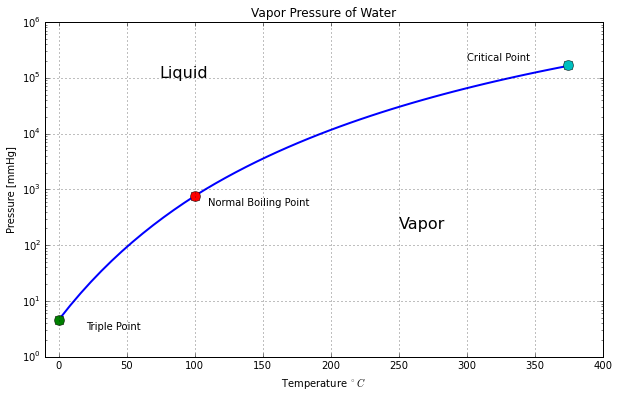

In [7]:
# Antoine's equation for water from 1 to 374 degrees C
    
def Psat(T):
    if (1 <= T < 100):
        return 10**(8.07131 - 1730.63/(T + 233.426))
    elif (100 <= T <= 374):
        return 10**(8.14019 - 1810.94/(T + 244.485))
    else:
        return float('nan')

# Use Psat(T) to construct to show the vapor-liquid equilibrium diagram

T = np.linspace(1,374)
plt.figure(figsize = (10,6))
plt.semilogy(T,map(Psat,T),linewidth=2)
plt.xlabel('Temperature $^{\circ}C$')
plt.ylabel('Pressure [mmHg]')
plt.title('Vapor Pressure of Water')

# Additional annotations

plt.semilogy(0.01,4.58,'o',markersize=10)
plt.annotate('Triple Point', xy=(10,4.58), xytext=(20,3))
plt.semilogy(100,760,'o',markersize=10)
plt.annotate('Normal Boiling Point', xy=(100,760), xytext=(110,500))
plt.semilogy(374,1.67e5,'o',markersize=10)
plt.annotate('Critical Point', xy=(374,1.67e5), xytext=(300,2e5))
plt.text(250,200,'Vapor',fontsize=16)
plt.text(75,100000,'Liquid',fontsize=16)
plt.xlim([-10,400])
plt.grid()

### Example: Boiling Point of Water on Mount Everest

The barometric pressure at the top of Mount Everest is about 260 mmHg. What is the boiling point of water?

In [8]:
# Through trial-and-error, we find
Psat(72.5)

259.590244400894

### Example: Operating Temperature of a Steam Catapult

The catapults on aircraft carriers require steam at 520 psig. What is the minimum operating temperature?

In [9]:
# import a root-finding algorithm
from scipy.optimize import brentq as fzero

# convert pressure to absolute mmHg
P = (400+14.7)*760/14.696

# function to solve
f = lambda T: Psat(T) - P

# solve
T = fzero(f,1,374)

print "Operating Pressure (absolute) = {:7.1f} mmHg".format(P)
print "Minimum Operating Temperature = {:7.2f} deg C".format(T)

Operating Pressure (absolute) = 21446.1 mmHg
Minimum Operating Temperature =  230.97 deg C


### Example: Relative Humidity

On a summer morning you notice dew on the grass. The temperature is $58^{\circ}F$. What is the mole fraction of water in the air? In the afternoon the air temperature reaches $80^{\circ}F$. What is the relative humidity?

#### Solution

Applying the ideal gas law, we set the partial pressure of water to the observed dew point temperature.

$$y_{H_2O}P = P^{sat}_{H_2O}(T_{dew})$$

which can be solved for $y_{H_2O}$. The relative humidity is just the ratio of teh partial pressure of water to the saturation pressure.

$$RH\% = \frac{y_{H_2O}P}{P^{sat}_{H_2O}(T)}\times 100\%$$

In [10]:
def f2c(T):
    return 5*(T-32.0)/9

Tdew = f2c(58)
P = 760
y = Psat(Tdew)/P

print "Mole fraction water = {:7.4f}".format(y)

T = f2c(80)
RH = y*P/Psat(T)

print "Relative humidity at {:.1f} deg C = {:.1f}%".format(T,100*RH)

Mole fraction water =  0.0162
Relative humidity at 26.7 deg C = 47.0%


## A Database of Antoine Equations

A simple database of Antoine equations for a set of chemical compounds is easily implemented with a Python dictionary. The unique names for each compound form keys for dictionary. Then for each key, Antoine's equation is implement as an anonymous function. Piecewise functions are implemented using standard Python logical statements. The supplementary dictionaries Psat_Tmin and Psat_Tmax represent upper and lower limits on the range of validity for the corresponding entry in Psat.

In [11]:
Psat = dict()
Psat_Tmin = dict()
Psat_Tmax = dict()

Psat['benzene'] = lambda T: 10**(6.90565 - 1211.033/(T + 220.790))
Psat_Tmin['benzene'] = 8
Psat_Tmax['benzene'] = 103
    
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(T + 222.65))
Psat_Tmin['ethanol'] = -2
Psat_Tmax['ethanol'] = 100
    
Psat['methanol'] = lambda T: \
    (T <= 65) and 10**(7.89750 - 1474.08/(T + 229.13)) or \
    (T > 65) and 10**(7.97328 - 1515.14/(T + 232.85))
Psat_Tmin['methanol'] = -14
Psat_Tmax['methanol'] = 110
    
Psat['toluene'] = lambda T: 10**(6.95464 - 1344.8/(T + 219.48))
Psat_Tmin['toluene'] = 6
Psat_Tmax['toluene'] = 137

Psat['water'] = lambda T: \
    (T <= 60) and 10**(8.10765 - 1750.286/(T + 235.0)) or \
    (T > 60) and 10**(7.96681 - 1668.21/(T + 228.0))
Psat_Tmin['water'] = 0
Psat_Tmax['water'] = 150
    

Generate a report of chemical compounds and temperature ranges for which saturation pressure can be computed.

In [12]:
print "{:15s}  {:7s}  {:7s}".format('Species','Tmin[C]','Tmax[C]')
print "{:15s}  {:7s}  {:7s}".format('-------','-------','-------')
species = Psat.keys()
for s in species:
    print "{:15s}  {:7.1f}  {:7.1f}".format(s,Psat_Tmin[s],Psat_Tmax[s])

Species          Tmin[C]  Tmax[C]
-------          -------  -------
benzene              8.0    103.0
water                0.0    150.0
methanol           -14.0    110.0
ethanol             -2.0    100.0
toluene              6.0    137.0


## Example: Vapor pressure of Water at 25 $^{\circ}C$

In [13]:
P = Psat['water'](25)

print "Vapor pressure of water at 25 deg C = {:4.1f} mmHg".format(P)

Vapor pressure of water at 25 deg C = 23.8 mmHg


## Example: Plotting Saturation Pressure for a Group of Compounds

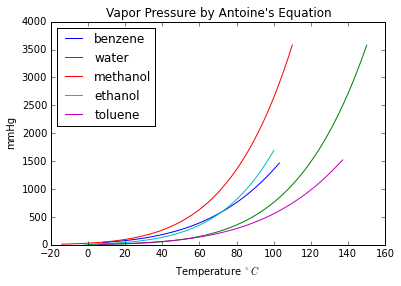

In [14]:
# Select a list of species
species = Psat.keys()

# Plot the saturation pressures over the individual temperature ranges
for s in species:
    T = np.linspace(Psat_Tmin[s],Psat_Tmax[s])
    plt.plot(T,map(Psat[s],T))
    
plt.legend(species,loc='best')
plt.xlabel('Temperature $^{\circ}C$')
plt.ylabel('mmHg')
plt.title('Vapor Pressure by Antoine\'s Equation');

## Saturation Temperatures

In [15]:
Tsat = dict()
Tsat_Pmin = dict()
Tsat_Pmax = dict()

from scipy.optimize import brentq as fzero 

for s in Psat.keys():
    Tsat_Pmin[s] = Psat[s](Psat_Tmin[s])
    Tsat_Pmax[s] = Psat[s](Psat_Tmax[s])
    Tsat[s] = lambda P,s = s: fzero(lambda T: Psat[s](T)-P,Psat_Tmin[s],Psat_Tmax[s])

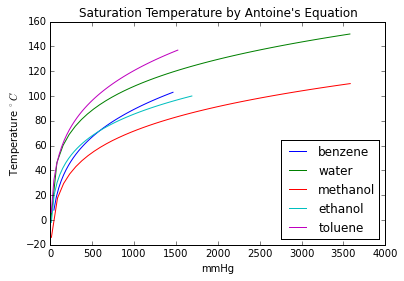

In [16]:
# Select a subset of species
s = ['methanol','ethanol']
s = Psat.keys()

# Plot the saturation pressure over the individual pressure ranges
for k in s:
    P = np.linspace(Tsat_Pmin[k],Tsat_Pmax[k])
    plt.plot(P,map(Tsat[k],P))
    
plt.legend(s,loc='best')
plt.xlabel('mmHg')
plt.ylabel('Temperature $^{\circ}C$')
plt.title('Saturation Temperature by Antoine\'s Equation');  

## Normal Boiling Points

In [17]:
species = Psat.keys()

print "{:12s}  {:>7s}".format('Species','Tb [C]')
print "{:12s}  {:>7s}".format('-------','------')

for s in species:
    Tb = Tsat[s](760)
    print "{:12s}  {:7.2f}".format(s,Tb)

Species        Tb [C]
-------        ------
benzene         80.10
water          100.00
methanol        64.71
ethanol         78.33
toluene        110.63
